In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import heapq
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from prettytable import PrettyTable
import sys
import time

In [2]:
class KNN():
    def __init__(self, k, distance_metric):
        self.k = k
        self.distance_metric = distance_metric

    def euclidean_dist(encoder_point, dataset):
        sum = np.sum((encoder_point-dataset)**2)
        return np.sqrt(sum)

    def manhattan_dist(encoder_point, dataset):
        return np.sum(abs(encoder_point-dataset))
    
    def cosine_dist(encoder_point, dataset):
        return 1-np.dot(encoder_point, dataset) / (np.linalg.norm(encoder_point)*np.linalg.norm(dataset))

    def fit(self, encoder, labels, dataset):
        dist = []
        count = 0
        for i in encoder:
            if (self.distance_metric == 1):
                dist.append((KNN.euclidean_dist(i, dataset), count))
            elif (self.distance_metric == 2):
                dist.append((KNN.manhattan_dist(i, dataset), count))
            elif (self.distance_metric == 3):
                dist.append((KNN.cosine_dist(i, dataset), count))
            count += 1

        smallest = heapq.nsmallest(self.k, dist)
        labels_store = {}
        for i, index in smallest:
            if labels[index] not in labels_store:
                labels_store[labels[index]] = 1
            else:
                labels_store[labels[index]] += 1
                
        max_element = -1
        final_label = ''

        for i in labels_store:
            if (max_element < labels_store[i]):
                max_element = labels_store[i]
                final_label = i

        return final_label


    def performance(self, y_val, y_pred):
        f1 = f1_score(y_val, y_pred, average='weighted', zero_division = 0)
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted', zero_division = 0)
        recall = recall_score(y_val, y_pred, average='weighted', zero_division = 0)
        return f1, accuracy, precision, recall

In [3]:
file = np.load("data.npy", allow_pickle=True)
i = 0

data_res = []
data_vit = []
labels = []

for i in range(0, len(file)):
    data1 = np.array(file[i][1][0])
    data_res.append(data1)
    data2 = np.array(file[i][2][0])
    data_vit.append(data2)
    labels.append(file[i][3])

label_index = np.arange(len(data_res[0]))+1


[]

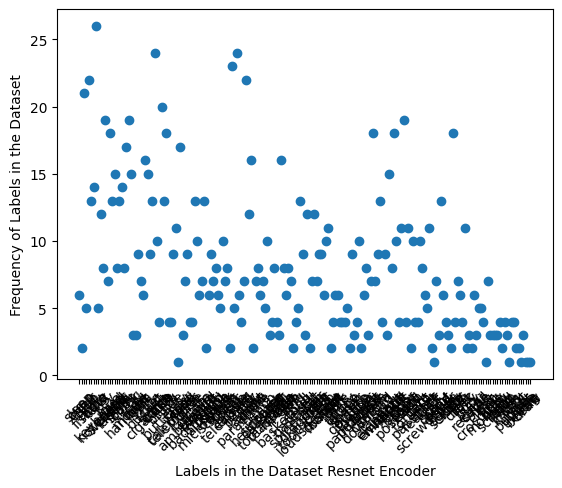

In [4]:
# part 2.2 

hash_res = {}
for i in range(0, len(data_res)):
    if file[i][3] not in hash_res:
        hash_res[file[i][3]] = 1
    else:
        hash_res[file[i][3]] += 1
l = [i for i in hash_res]
l1 = [hash_res[i] for i in hash_res]
plt.scatter(l, l1)
plt.xlabel('Labels in the Dataset Resnet Encoder')
plt.ylabel('Frequency of Labels in the Dataset')
plt.xticks(rotation=45)
plt.plot()

[]

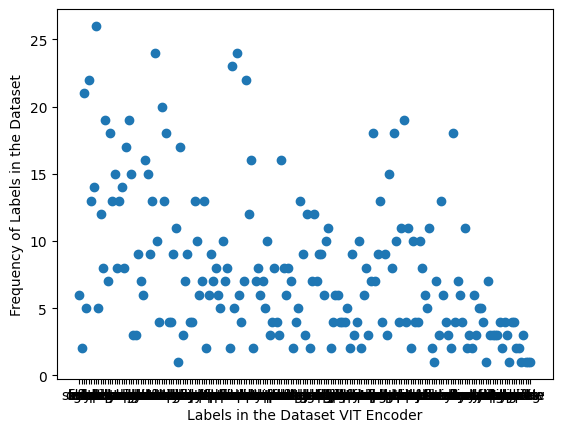

In [5]:
# part 2.2 

hash_vit = {}
for i in range(0, len(data_res)):
    if file[i][3] not in hash_vit:
        hash_vit[file[i][3]] = 1
    else:
        hash_vit[file[i][3]] += 1
l = [i for i in hash_vit]
l1 = [hash_vit[i] for i in hash_vit]
plt.scatter(l, l1)
plt.xlabel('Labels in the Dataset VIT Encoder')
plt.ylabel('Frequency of Labels in the Dataset')
plt.plot()

Best Triplet: k =  13 metric =  2 encoder =  vit accuracy =  0.2966666666666667
[0.2966666666666667, 13, 2, 'vit']
[0.2966666666666667, 15, 2, 'vit']
[0.2866666666666667, 11, 1, 'vit']
[0.2833333333333333, 7, 3, 'vit']
[0.28, 5, 1, 'vit']
[0.28, 11, 2, 'vit']
[0.28, 13, 1, 'vit']
[0.2733333333333333, 7, 1, 'vit']
[0.2733333333333333, 9, 2, 'vit']
[0.2733333333333333, 9, 3, 'vit']
[0.2733333333333333, 21, 2, 'vit']
[0.27, 5, 2, 'vit']
[0.27, 9, 1, 'vit']
[0.27, 11, 3, 'vit']
[0.27, 13, 3, 'vit']
[0.27, 15, 1, 'vit']
[0.27, 17, 2, 'vit']
[0.27, 19, 2, 'vit']
[0.26666666666666666, 5, 3, 'vit']
[0.26666666666666666, 7, 2, 'vit']
Most Optimised Triplet: k =  27 metric =  2 encoder = resnet


[]

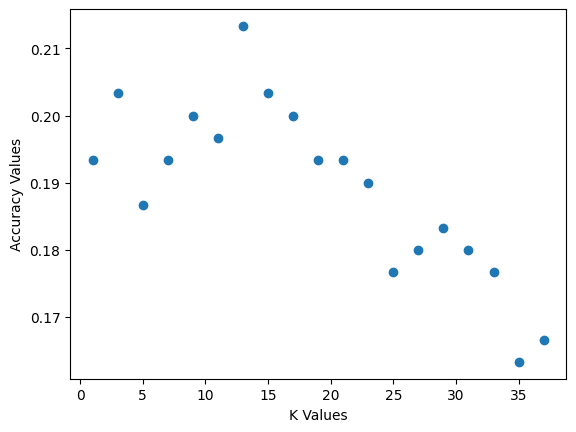

In [6]:
# part 2.4 Best Triplets Code
accuracy = np.array([])
precision = np.array([])
recall = np.array([])

split_fac = 0.2


X_train_res, X_test_res, Y_train_res, Y_test_res = train_test_split(data_res, labels, test_size=0.2, random_state = None)
X_train_vit, X_test_vit, Y_train_vit, Y_test_vit = train_test_split(data_vit, labels, test_size=0.2, random_state = None)

best_triplet = []
optimised_triplet = []

l = []
heapq.heapify(l)
time_optimised = -1

# resnet encoder
for i in range(1, math.isqrt(len(data_res)), 2):
    for metric in range(1, 4):
        prediction = []
        predicted_val = ''

        knn = KNN(i, metric)
        start = time.perf_counter()

        for j in range(len(X_test_res)):
            dataset = X_test_res[j]
            predicted_val = knn.fit(X_train_res, Y_train_res, dataset)
            prediction.append(predicted_val)

        end = time.perf_counter()

        if (len(optimised_triplet) == 0):
            optimised_triplet = [i, metric]
            time_optimised = end-start

        elif (time_optimised > end-start):
            optimised_triplet = [i, metric]
            time_optimised = end-start


        f, a, p, r = knn.performance(Y_test_res, prediction)
        heapq.heappush(l, [-a, i, metric, 'resnet'])


# vit encoder
for i in range(1, math.isqrt(len(data_vit)), 2):
    for metric in range(1, 4):
        prediction = []
        predicted_val = ''
        
        knn = KNN(i, metric)
        for j in range(len(X_test_vit)):
            dataset = X_test_vit[j]
            predicted_val = knn.fit(X_train_vit, Y_train_vit, dataset)
            prediction.append(predicted_val)
            
        f, a, p, r = knn.performance(Y_test_vit, prediction)
        heapq.heappush(l, [-a, i, metric, 'vit'])


k_values = np.arange(1, math.isqrt(len(data_res)), 2)
acc_val = np.array([])
for i in range(1, math.isqrt(len(data_res)), 2):
    prediction = []
    predicted_val = ''
    
    knn = KNN(i, 1)
    for j in range(len(X_test_res)):
        dataset = X_test_res[j]
        predicted_val = knn.fit(X_train_res, Y_train_res, dataset)
        prediction.append(predicted_val)
        
    f, a, p, r = knn.performance(Y_test_res, prediction)
    store = np.array([a])
    acc_val = np.append(acc_val, store)
    

ordered_list = []                       # 20 best triplets
for i in range(20):
    if (i == 0):
        best_triplet = heapq.heappop(l)
        ordered_list.append(best_triplet)
    else:
        x = heapq.heappop(l)
        ordered_list.append(x)

for i in range(20):
    ordered_list[i][0] *= -1

print("Best Triplet: k = ", best_triplet[1], "metric = ", best_triplet[2], "encoder = ", best_triplet[3], "accuracy = ", best_triplet[0])

for i in range(0, 20):
    print(ordered_list[i])

print("Most Optimised Triplet: k = ", optimised_triplet[0], "metric = ", optimised_triplet[1], "encoder = resnet")
plt.scatter(k_values, acc_val)
plt.xlabel('K Values')  
plt.ylabel('Accuracy Values')
plt.plot()

[]

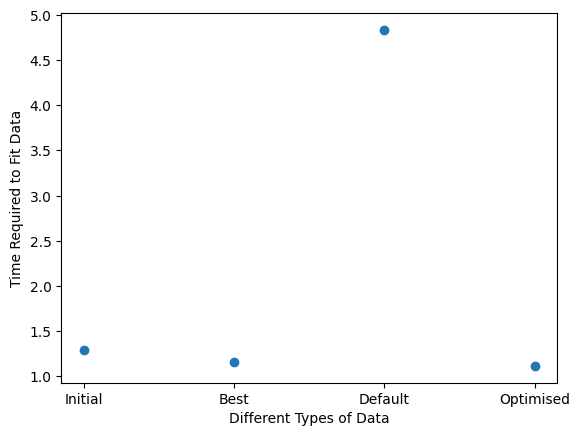

In [17]:
# part 2.6 (b)

X_train_res, X_test_res, Y_train_res, Y_test_res = train_test_split(data_res, labels, test_size=0.2, random_state = None)

# initial KNN Model
start = time.perf_counter()
knn = KNN(41, 1)
prediction = []
predicted_val = ''
for j in range(len(X_test_res)):
    dataset = X_test_res[j]
    predicted_val = knn.fit(X_train_res, Y_train_res, dataset)
    prediction.append(predicted_val)
end = time.perf_counter()
initial = end-start

# best KNN Model
start = time.perf_counter()
knn = KNN(best_triplet[1], best_triplet[2])
prediction = []
predicted_val = ''
for j in range(len(X_test_res)):
    dataset = X_test_res[j]
    predicted_val = knn.fit(X_train_res, Y_train_res, dataset)
    prediction.append(predicted_val)
end = time.perf_counter()
best = end-start

# most optimised Model
start = time.perf_counter()
knn = KNN(optimised_triplet[0], optimised_triplet[1])
prediction = []
predicted_val = ''
for j in range(len(X_test_res)):
    dataset = X_test_res[j]
    predicted_val = knn.fit(X_train_res, Y_train_res, dataset)
    prediction.append(predicted_val)
end = time.perf_counter()
optimised = end-start

# default sklearn Model
start = time.perf_counter()
knn = KNeighborsClassifier()
prediction = []
predicted_val = ''
for j in range(len(X_test_res)):
    dataset = X_test_res[j]
    knn.fit(X_train_res, Y_train_res)
    dataset = np.array([dataset])
    predicted_val = knn.predict(dataset)
    prediction.append(predicted_val)
end = time.perf_counter()
default = end-start

l = [initial, best, default, optimised]
classes = ['Initial', 'Best', 'Default', 'Optimised']
plt.scatter(classes, l)
plt.xlabel("Different Types of Data")
plt.ylabel("Time Required to Fit Data")
plt.plot()

### Plot of Inference Time Vs Train Dataset Size ###

For Train Set Ratio =  0.1 and Test Set Ratio = 0.2, Best Triplet: k =  1 metric =  2 encoder =  vit accuracy =  0.13666666666666666 time =  0.13268468499995834
For Train Set Ratio =  0.1 and Test Set Ratio = 0.2, Most Optimised Triplet: k =  15 metric =  2 encoder =  vit time =  0.13114730899997085
For Train Set Ratio =  0.2 and Test Set Ratio = 0.2, Best Triplet: k =  1 metric =  2 encoder =  vit accuracy =  0.17333333333333334 time =  0.27387234500019986
For Train Set Ratio =  0.2 and Test Set Ratio = 0.2, Most Optimised Triplet: k =  9 metric =  2 encoder =  vit time =  0.27273345399999016
For Train Set Ratio =  0.3 and Test Set Ratio = 0.2, Best Triplet: k =  5 metric =  2 encoder =  vit accuracy =  0.22333333333333333 time =  0.4109022730003744
For Train Set Ratio =  0.3 and Test Set Ratio = 0.2, Most Optimised Triplet: k =  13 metric =  2 encoder =  vit time =  0.40470373399966775
For Train Set Ratio =  0.4 and Test Set Ratio = 0.2, Best Triplet: k =  5 metric =  3 encoder =  vi

[]

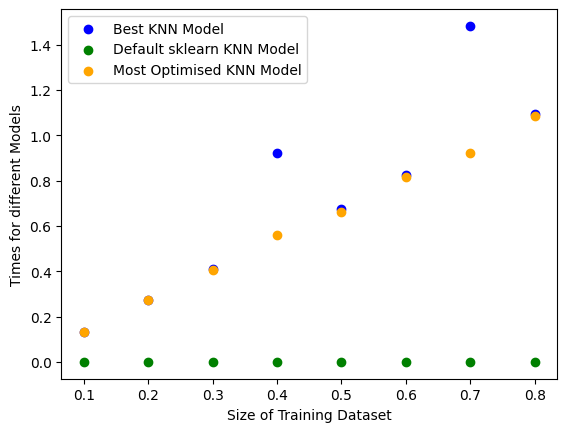

In [16]:
# part 2.6 (c)

train_ratio = np.arange(8)+1
train_ratio = train_ratio/10
time_initial = np.array([])
time_best = np.array([])
optimised_time = np.array([])
time_default = np.array([])


for idx in range(1, 9):
    X_train_res, X_test_res, Y_train_res, Y_test_res = train_test_split(data_res, labels, test_size=0.2, train_size=idx/10, random_state = None)
    X_train_vit, X_test_vit, Y_train_vit, Y_test_vit = train_test_split(data_vit, labels, test_size=0.2, train_size=idx/10, random_state = None)

    best_triplet = []
    optimised_triplet = []

    l = []
    heapq.heapify(l)
    time_optimised = -1
    default_time = 0

    # resnet encoder
    for i in range(1, math.isqrt(len(data_res)), 2):
        for metric in range(1, 4):
            prediction = []
            predicted_val = ''

            knn = KNN(i, metric)
            start = time.perf_counter()

            for j in range(len(X_test_res)):
                dataset = X_test_res[j]
                predicted_val = knn.fit(X_train_res, Y_train_res, dataset)
                prediction.append(predicted_val)

            end = time.perf_counter()

            if (len(optimised_triplet) == 0):
                optimised_triplet = [i, metric, 'resnet', end-start]
                time_optimised = end-start

            elif (time_optimised > end-start):
                optimised_triplet = [i, metric, 'resnet', end-start]
                time_optimised = end-start


            f, a, p, r = knn.performance(Y_test_res, prediction)
            heapq.heappush(l, [-a, i, metric, 'resnet', end-start])


    # vit encoder
    for i in range(1, math.isqrt(len(data_vit)), 2):
        for metric in range(1, 4):
            prediction = []
            predicted_val = ''
            
            knn = KNN(i, metric)
            start = time.perf_counter()

            for j in range(len(X_test_vit)):
                dataset = X_test_vit[j]
                predicted_val = knn.fit(X_train_vit, Y_train_vit, dataset)
                prediction.append(predicted_val)
            
            end = time.perf_counter()

            if (time_optimised > end-start):
                optimised_triplet = [i, metric, 'vit', end-start]
                time_optimised = end-start


            f, a, p, r = knn.performance(Y_test_vit, prediction)
            heapq.heappush(l, [-a, i, metric, 'vit', end-start])

    best_triplet = heapq.heappop(l)
    
    knn = KNeighborsClassifier(n_neighbors=best_triplet[1])
    start = time.perf_counter()
    if (best_triplet[3] == 'resnet'):
        for j in range(len(X_test_res)):
            dataset = X_test_res[j]
            predicted_val = knn.fit(X_train_res, Y_train_res)
            dataset = np.array([dataset])
            predicted_val = knn.predict(dataset)
            prediction.append(predicted_val)
    else:
        for j in range(len(X_test_vit)):
            dataset = X_test_vit[j]
            predicted_val = knn.fit(X_train_vit, Y_train_vit)
            dataset = np.array([dataset])
            predicted_val = knn.predict(dataset)
            prediction.append(predicted_val)
    end = time.perf_counter()
    default = end-start


    print("For Train Set Ratio = ", idx/10, "and Test Set Ratio = 0.2, Best Triplet: k = ", best_triplet[1], "metric = ", best_triplet[2], "encoder = ", best_triplet[3], "accuracy = ", -best_triplet[0], "time = ", best_triplet[4])
    print("For Train Set Ratio = ", idx/10, "and Test Set Ratio = 0.2, Most Optimised Triplet: k = ", optimised_triplet[0], "metric = ", optimised_triplet[1], "encoder = ", optimised_triplet[2], "time = ", optimised_triplet[3])
    optimised_time = np.append(optimised_time, np.array([optimised_triplet[3]]))
    time_best = np.append(time_best, np.array([best_triplet[4]]))
    time_default = np.append(time_default, np.array([default_time]))

plt.scatter(train_ratio, time_best, color='blue')
plt.scatter(train_ratio, time_default, color='green')
plt.scatter(train_ratio, optimised_time, color='orange')
plt.legend(['Best KNN Model', 'Default sklearn KNN Model', 'Most Optimised KNN Model'])
plt.xlabel("Size of Training Dataset")
plt.ylabel("Times for different Models")
plt.plot()

### Decision Trees ###

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputClassifier

In [2]:
class powerset():

    def __init__(self, max_depth, max_features, criterion):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion

    def fit(self, dataset, labels):
        
        dt_clf = None
        if (self.criterion == 'gini'):
            dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = self.max_depth, max_features = self.max_features)
        elif (self.criterion == 'entropy'):
            dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = self.max_depth, max_features = self.max_features)
        dt_clf.fit(dataset, labels)
        return dt_clf

In [3]:
class multioutput():

    def __init__(self, max_depth, max_features, criterion):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion

    def fit(self, dataset, labels):
        
        dt_clf = None
        if (self.criterion == 'gini'):
            dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = self.max_depth, max_features = self.max_features)
        elif (self.criterion == 'entropy'):
            dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = self.max_depth, max_features = self.max_features)
        # dt_clf.fit(dataset, labels)
        multi_output_classifier = MultiOutputClassifier(dt_clf)
        multi_output_classifier.fit(dataset, labels)
        return multi_output_classifier
        # return dt_clf

In [4]:
def label_assign(label_set, label_map):
    j = 0
    for i in label_set:
        label_map[i] = j
        j += 1
    return

data = pd.read_csv('advertisement.csv')
label_map = {}
label_set = set()

for i in data['labels']:
    x = i.split(' ')
    y = []
    for label in x:
        label_set.add(label)
    
label_assign(label_set, label_map)

### Data Exploration and Visualisation ###

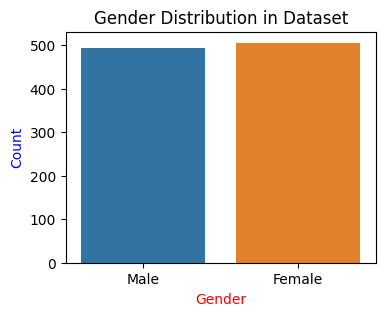

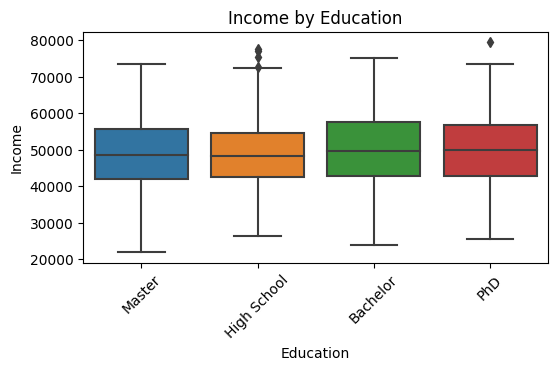

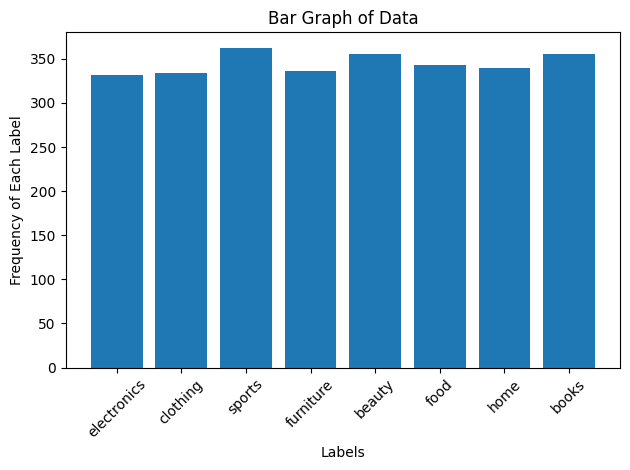

,age,gender,income,education,married,children,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,Businessman,86.847281,carpet,home
...,...,...,...,...,...,...,...,...,...,...
995,61,Male,34246.773063,Master,True,3,HR,103.357441,bed,food furniture
996,56,Female,45494.225591,Bachelor,False,0,Engineer,85.159023,biscuits,home clothing food
997,64,Female,68740.442006,PhD,True,0,Salesman,101.434650,bat,sports clothing
998,18,Female,44348.446680,Bachelor,True,0,Retired,97.649988,perfume,beauty


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
data = data.dropna()
data = data.drop(columns='city')
plt.figure(figsize=(4,3))
sns.countplot(data=data, x='gender')
plt.title('Gender Distribution in Dataset')
plt.xlabel('Gender', color = 'red')
plt.ylabel('Count', color = 'blue')
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(data=data, x='education', y='income')
plt.title('Income by Education')
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()


y = data["labels"].str.split().apply(lambda labels: labels if isinstance(labels, list) else [])  # Convert labels to lists
count = {}
for i in range(0, len(y)):
    for j in range(0, len(y[i])): 
        if (y[i][j] not in count):
            count[y[i][j]] = 1
        else:
            count[y[i][j]] += 1
x = [i for i in count]
y = [count[i] for i in count]
count

categories = list(count.keys())
values = list(count.values())

plt.bar(categories, values)
plt.xlabel('Labels')
plt.ylabel('Frequency of Each Label')
plt.title('Bar Graph of Data')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
data

### Powerset Formulation Code ###

In [6]:
# powerset formulation

# Data Preprocessing and Data Featurization Starts

depth_l = np.array([3, 5, 10, 20, 30])
features_l = np.array([3, 5, 7, 9, 11])

# Perform One-Hot Encoding of all the Categorical Variables
columns_to_exclude = ['labels']
columns = [col for col in data.columns if col not in columns_to_exclude]
encoder = OneHotEncoder()
enc_data = pd.DataFrame(encoder.fit_transform(data[columns]).toarray())
enc_data = np.array(enc_data)

y = data["labels"].str.split().apply(lambda labels: labels if isinstance(labels, list) else [])  # Convert labels to lists

# Perform One-Hot Encoding of the Label Set
classify_Y = np.zeros((len(y), 2**(len(label_set))))
count = 0
for z in y:
    z.sort()
    sum = 0
    for i in range(0, len(z)):
        sum += label_map[z[i]]
    classify_Y[count][sum] = 1
    count += 1


# Data Preprocessing and Data Featurization Ends    

X_train, X_test, Y_train, Y_test = train_test_split(enc_data, classify_Y, test_size=0.2, random_state = None)

accuracy = np.array([])
precision = np.array([])
recall = np.array([])
f1_micro = []
f1_macro = []

for depth in depth_l:
    for num_features in features_l:
        dt = powerset(depth, num_features, 'gini')
        dt_clf = dt.fit(X_train, Y_train)
        # predictions = np.zeros(len(X_test))
        predictions = np.zeros((len(Y_test), 2**(len(label_set))))

        for i in range(0, len(X_test)):
            arr = np.array(X_test[i]).reshape(1, -1)
            pred = dt_clf.predict(arr)
            predictions[i] = pred
            
        a = accuracy_score(predictions, Y_test)
        p = precision_score(predictions, Y_test, average = 'weighted', zero_division = 0)
        r = recall_score(predictions, Y_test, average = 'weighted', zero_division = 0)
        f_macro = f1_score(predictions, Y_test, average = 'macro', zero_division = 1)
        f_micro = f1_score(predictions, Y_test, average = 'micro', zero_division = 1)
        accuracy = np.append(accuracy, np.array([a]))
        precision = np.append(precision, np.array([p]))
        recall = np.append(recall, np.array([r]))
        # f1 = np.append(f1, np.array([f, depth, num_features]))
        f1_micro.append([f_micro, depth, num_features, 'gini'])
        f1_macro.append([f_macro, depth, num_features, 'gini'])
        confusion_matrix = multilabel_confusion_matrix(Y_test, predictions)
        print("depth = ", depth, "number = ", num_features, "confusion matrix = ", confusion_matrix)


for depth in depth_l:
    for num_features in features_l:
        dt = powerset(depth, num_features, 'entropy')
        dt_clf = dt.fit(X_train, Y_train)
        # predictions = np.zeros(len(X_test))
        predictions = np.zeros((len(Y_test), 2**(len(label_set))))

        for i in range(0, len(X_test)):
            arr = np.array(X_test[i]).reshape(1, -1)
            pred = dt_clf.predict(arr)
            predictions[i] = pred
        
        a = accuracy_score(predictions, Y_test)
        p = precision_score(predictions, Y_test, average = 'weighted', zero_division = 0)
        r = recall_score(predictions, Y_test, average = 'weighted', zero_division = 0)
        # f = f1_score(predictions, Y_test, average = 'micro', zero_division = 1)
        f_macro = f1_score(predictions, Y_test, average = 'macro', zero_division = 1)
        f_micro = f1_score(predictions, Y_test, average = 'micro', zero_division = 1)
        accuracy = np.append(accuracy, np.array([a]))
        precision = np.append(precision, np.array([p]))
        recall = np.append(recall, np.array([r]))
        f1_macro.append([f_macro, depth, num_features, 'entropy'])
        f1_micro.append([f_micro, depth, num_features, 'entropy'])
        confusion_matrix = multilabel_confusion_matrix(Y_test, predictions)
        print("depth = ", depth, "number = ", num_features, "confusion matrix = ", confusion_matrix)


accuracy.sort()
# accuracy
print(accuracy)
print(precision)
print(recall)
x = np.array([])
for i in range(0, len(f1_micro)):
    x = np.append(x, np.array([f1_micro[i][0]]))
print(x)

x = np.array([])
for i in range(0, len(f1_macro)):
    x = np.append(x, np.array([f1_macro[i][0]]))
print(x)

f1_macro.sort()
print("Confusion Matrix = ")

print("Top 3 Hyperparamter Sets (According to F1 Score Macro) are as follows: ")
length = len(f1_macro)

best_powerset = [f1_macro[length-1][1], f1_macro[length-1][2], f1_macro[length-1][3]]

print(f1_macro[length-3][1], f1_macro[length-3][2], f1_macro[length-3][3])
print(f1_macro[length-2][1], f1_macro[length-2][2], f1_macro[length-2][3])
print(f1_macro[length-1][1], f1_macro[length-1][2], f1_macro[length-1][3])

depth =  3 number =  3 confusion matrix =  [[[195   0]
  [  5   0]]

 [[194   0]
  [  6   0]]

 [[196   0]
  [  4   0]]

 ...

 [[200   0]
  [  0   0]]

 [[200   0]
  [  0   0]]

 [[200   0]
  [  0   0]]]
depth =  3 number =  5 confusion matrix =  [[[195   0]
  [  5   0]]

 [[194   0]
  [  6   0]]

 [[196   0]
  [  4   0]]

 ...

 [[200   0]
  [  0   0]]

 [[200   0]
  [  0   0]]

 [[200   0]
  [  0   0]]]
depth =  3 number =  7 confusion matrix =  [[[195   0]
  [  5   0]]

 [[194   0]
  [  6   0]]

 [[196   0]
  [  4   0]]

 ...

 [[200   0]
  [  0   0]]

 [[200   0]
  [  0   0]]

 [[200   0]
  [  0   0]]]
depth =  3 number =  9 confusion matrix =  [[[195   0]
  [  5   0]]

 [[194   0]
  [  6   0]]

 [[196   0]
  [  4   0]]

 ...

 [[200   0]
  [  0   0]]

 [[200   0]
  [  0   0]]

 [[200   0]
  [  0   0]]]
depth =  3 number =  11 confusion matrix =  [[[195   0]
  [  5   0]]

 [[194   0]
  [  6   0]]

 [[196   0]
  [  4   0]]

 ...

 [[200   0]
  [  0   0]]

 [[200   0]
  [  0   0]]



### Multioutput Formulation Code ###

In [7]:
# Data Preprocessing and Data Featurization Starts

mlb = MultiLabelBinarizer()

depth_l = np.array([3, 5, 10, 20, 30])
features_l = np.array([3, 5, 7, 9, 11])

columns_to_exclude = ['labels']
columns = [col for col in data.columns if col not in columns_to_exclude]

X = data.drop(columns=["labels"])
y = data["labels"].str.split().apply(lambda labels: labels if isinstance(labels, list) else [])

# Perform one-hot encoding for categorical variables in X
encoder = OneHotEncoder(sparse_output=False)
encoded_X = encoder.fit_transform(X[columns])
encoded_X = pd.DataFrame(encoded_X, columns=encoder.get_feature_names_out(columns))

# Data Preprocessing and Data Featurization Ends

X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.2, random_state=None)

y_train = mlb.fit_transform(y_train)
y_test = mlb.fit_transform(y_test)

accuracy = np.array([])
precision = np.array([])
recall = np.array([])
f1_macro = []
f1_micro = []

for depth in depth_l:
    for num_features in features_l:
        dt = multioutput(depth, num_features, 'gini')
        multi_output_classifier = dt.fit(X_train, y_train)
        predictions = multi_output_classifier.predict(X_test)
        # print("Predictions:", predictions)
        a = accuracy_score(predictions, y_test)
        p = precision_score(predictions, y_test, average = 'weighted', zero_division = 0)
        r = recall_score(predictions, y_test, average = 'weighted', zero_division = 0)
        f_micro = f1_score(predictions, y_test, average = 'micro', zero_division = 1)
        f_macro = f1_score(predictions, y_test, average = 'macro', zero_division = 1)
        accuracy = np.append(accuracy, np.array([a]))
        recall = np.append(recall, np.array([r]))
        precision = np.append(precision, np.array([p]))
        f1_micro.append([f_micro, depth, num_features, 'entropy'])
        f1_macro.append([f_macro, depth, num_features, 'entropy'])
        confusion_matrix = multilabel_confusion_matrix(y_test, predictions)
        print("depth = ", depth, "number = ", num_features, "confusion matrix = ", confusion_matrix)


for depth in depth_l:
    for num_features in features_l:
        dt = multioutput(depth, num_features, 'entropy')
        multi_output_classifier = dt.fit(X_train, y_train)
        predictions = multi_output_classifier.predict(X_test)
        a = accuracy_score(predictions, y_test)
        p = precision_score(predictions, y_test, average = 'weighted', zero_division = 0)
        r = recall_score(predictions, y_test, average = 'weighted', zero_division = 0)
        f_micro = f1_score(predictions, y_test, average = 'micro', zero_division = 1)
        f_macro = f1_score(predictions, y_test, average = 'macro', zero_division = 1)
        accuracy = np.append(accuracy, np.array([a]))
        recall = np.append(recall, np.array([r]))
        precision = np.append(precision, np.array([p]))
        f1_micro.append([f_micro, depth, num_features, 'entropy'])
        f1_macro.append([f_macro, depth, num_features, 'entropy'])
        confusion_matrix = multilabel_confusion_matrix(y_test, predictions)
        print("depth = ", depth, "number = ", num_features, "confusion matrix = ", confusion_matrix)


accuracy.sort()
# accuracy
print(accuracy)
print(precision)
print(recall)
x = np.array([])
for i in range(0, len(f1_micro)):
    x = np.append(x, np.array([f1_micro[i][0]]))
print(x)

x = np.array([])
for i in range(0, len(f1_macro)):
    x = np.append(x, np.array([f1_macro[i][0]]))
print(x)

f1_macro.sort()
print("Top 3 Hyperparamter Sets (According to F1 Score Macro) are as follows: ")
length = len(f1_macro)

best_multioutput = [f1_macro[length-1][1], f1_macro[length-1][2], f1_macro[length-1][3]]

print(f1_macro[length-3][1], f1_macro[length-3][2], f1_macro[length-3][3])
print(f1_macro[length-2][1], f1_macro[length-2][2], f1_macro[length-2][3])
print(f1_macro[length-1][1], f1_macro[length-1][2], f1_macro[length-1][3])

depth =  3 number =  3 confusion matrix =  [[[127   0]
  [ 73   0]]

 [[128   0]
  [ 72   0]]

 [[137   0]
  [ 63   0]]

 [[136   0]
  [ 64   0]]

 [[136   0]
  [ 64   0]]

 [[126   0]
  [ 74   0]]

 [[132   0]
  [ 68   0]]

 [[139   0]
  [ 61   0]]]
depth =  3 number =  5 confusion matrix =  [[[126   1]
  [ 73   0]]

 [[128   0]
  [ 72   0]]

 [[137   0]
  [ 63   0]]

 [[136   0]
  [ 64   0]]

 [[133   3]
  [ 64   0]]

 [[126   0]
  [ 74   0]]

 [[132   0]
  [ 68   0]]

 [[139   0]
  [ 61   0]]]
depth =  3 number =  7 confusion matrix =  [[[127   0]
  [ 73   0]]

 [[128   0]
  [ 72   0]]

 [[137   0]
  [ 63   0]]

 [[136   0]
  [ 64   0]]

 [[136   0]
  [ 64   0]]

 [[126   0]
  [ 74   0]]

 [[132   0]
  [ 68   0]]

 [[139   0]
  [ 61   0]]]
depth =  3 number =  9 confusion matrix =  [[[127   0]
  [ 73   0]]

 [[128   0]
  [ 72   0]]

 [[137   0]
  [ 63   0]]

 [[136   0]
  [ 53  11]]

 [[136   0]
  [ 64   0]]

 [[126   0]
  [ 74   0]]

 [[132   0]
  [ 68   0]]

 [[139   0]
  [ 61   0

### K-Fold Validation ###

In [8]:
# for powerset formulation

Y = np.zeros(len(data))
count = 0
for i in data['labels']:
    x = i.split(' ')
    for label in label_set:
        if (label in x):
            index = label_map[label]
            Y[count] += (2**index)
    count += 1

columns_to_exclude = ['labels']
columns = [col for col in data.columns if col not in columns_to_exclude]
encoder = OneHotEncoder()
enc_data = pd.DataFrame(encoder.fit_transform(data[columns]).toarray())
enc_data = np.array(enc_data)

k = 5
kf = KFold(n_splits=k, random_state=None)
model = powerset(best_powerset[0], best_powerset[1], best_powerset[2])
 
accuracy = []
for train_index, test_index in kf.split(enc_data):
    X_train, X_test = enc_data[train_index], enc_data[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    dt_clf = model.fit(X_train, Y_train)
    predictions = dt_clf.predict(X_test)
    res = accuracy_score(predictions, Y_test)
    accuracy.append(res)
average_performance = np.mean(accuracy)
print("Average Performance for Powerset Formulation :", average_performance)




# for multioutput formulation
X = data.drop(columns = ["labels"])
y = data["labels"].str.split().apply(lambda labels: labels if isinstance(labels, list) else [])  # Convert labels to lists

# Perform one-hot encoding for categorical variables in X
encoder = OneHotEncoder(sparse_output = False)
encoded_X = encoder.fit_transform(X[columns])
encoded_X = pd.DataFrame(encoded_X, columns=encoder.get_feature_names_out(columns))

k = 5
kf = KFold(n_splits=k, random_state=None)
model = multioutput(best_multioutput[0], best_multioutput[1], best_multioutput[2])

accuracy = []
for train_index, test_index in kf.split(encoded_X):
    X_train, X_test = enc_data[train_index], enc_data[test_index]
    # Y_train, Y_test = Y[train_index], Y[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_train = mlb.fit_transform(y_train)
    y_test = mlb.fit_transform(y_test)

    multi_output_classifier = dt.fit(X_train, y_train)
    predictions = multi_output_classifier.predict(X_test)
    res = accuracy_score(predictions, y_test)
    accuracy.append(res)
average_performance = np.mean(accuracy)
print("Average Performance for Multioutput Formulation :", average_performance)

Average Performance for Powerset Formulation : 0.023
Average Performance for Multioutput Formulation : 0.022
